# Introducci√≥n a RAG (Retrieval-Augmented Generation)

Autor: Ing. √Ångel Nicol√°s Heredia (LIDESIA)

Directora: Dra. Laura Diaz D√°vila (LIDESIA)

Google Colab permite ejecutar c√≥digo Python en un entorno de computaci√≥n en la nube. La versi√≥n gratuita te brinda acceso a recursos compartidos, que incluyen:

‚úÖ Sistema operativo\
Basado en Linux (Debian/Ubuntu).

Python 3.11 (a julio de 2025).

‚úÖ CPU\
CPU virtual (Intel Xeon) con 2 n√∫cleos.
Entre 12 GB y 16 GB de RAM disponibles, dependiendo del entorno.

‚úÖ GPU\
El modelo m√°s com√∫n para las versi√≥n gratuita es: \
**NVIDIA T4 con 16 GB de VRAM**


**CUDA** (Compute Unified Device Architecture) es una plataforma de computaci√≥n paralela y un modelo de programaci√≥n desarrollado por NVIDIA que permite usar las GPUs para c√≥mputo general, no solo para gr√°ficos.

In [ ]:
# ============================================================================
# INSTALACI√ìN DE LIBRER√çAS PRINCIPALES
# ============================================================================

# LangChain: Framework principal para aplicaciones con LLM
# - langchain: Librer√≠a base con componentes esenciales
# - langchain-community: Integraciones con servicios externos
# - langchain-huggingface: Integraci√≥n espec√≠fica con HuggingFace
!pip install -qU langchain langchain-community langchain-huggingface

# Embeddings y b√∫squeda vectorial
# - sentence-transformers: Para crear representaciones vectoriales de texto
# - faiss-cpu: Base de datos vectorial para b√∫squeda de similitud eficiente
!pip install -qU sentence-transformers faiss-cpu

# Transformers: Librer√≠a de HuggingFace para modelos pre-entrenados
# - transformers: Acceso a modelos
# - accelerate: Optimizaci√≥n para entrenamiento e inferencia
!pip install -q transformers accelerate

!pip install -q pypdf  # Para archivos PDF

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.5/2.5 MB 24.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 45.2/45.2 kB 2.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 50.9/50.9 kB 3.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 470.2/470.2 kB 12.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31.3/31.3 MB 37.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [ ]:
# Conectarse a drive para manejar archivos de mi unidad
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importar todas las librer√≠as necesarias

from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.chains import RetrievalQA
from transformers import AutoTokenizer, AutoModelForCausalLM

## Usar el modelo sin RAG


Usaremos el modelo **Qwen2.5-3B-Instruct**: \
Qwen2.5-3B-Instruct es un modelo de lenguaje grande (LLM) de c√≥digo abierto desarrollado por el equipo Qwen de **Alibaba Cloud**. 3B hace referencia al n√∫mero de par√°metros del modelo, aproximadamente 3 mil millones. Est√° espec√≠ficamente entrenado para seguir √≥rdenes, responder preguntas y mantener conversaciones coherentes, haci√©ndolo mucho m√°s √∫til para aplicaciones de chatbot y asistentes. Tiene un excelente desempe√±o en m√°s de 29 idiomas y puede procesar contextos de entrada de hasta 32,768 tokens y generar respuestas de hasta 8,192 tokens.

Este tama√±o de modelo es posible importarlo y usarlo en la computadora que nos facilita Colab, con una GPU de 16 GB de VRAM.




La diferencia de tama√±o entre Qwen2.5-3B-Instruct y los grandes modelos como GPT-4o o Gemini 1.5 Pro es grande. Estos grandes modelos de lenguaje, poseen una cantidad de parametros que andan por el orden del billon, es decir tres ordenes de magnitud m√°s que el modelo que usaremos aqu√≠.

A continuaci√≥n vamos a importar un modelo de lenguaje desde Hugging Face y cargarlo en la GPU gratuita que nos ofrece Google Colab.

Tambi√©n vamos a traer el tokenizador, que es el componente encargado de dividir el texto de entrada en fragmentos (llamados tokens).

Usaremos las librer√≠as transformers y accelerate, que est√°n dise√±adas para trabajar eficientemente sobre GPUs NVIDIA ‚Äî ya que gran parte de la tecnolog√≠a que utilizan los modelos grandes de IA est√° optimizada para CUDA, el ecosistema de c√≥mputo en GPU de NVIDIA.

In [ ]:
# ============================================================================
# CARGAR EL MODELO LLM
# ============================================================================
import torch

model_name = "Qwen/Qwen2.5-3B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    device_map="auto",
    trust_remote_code=True
)

print("‚úÖ Modelo cargado exitosamente!")
print(f"Memoria GPU usada: {torch.cuda.memory_allocated()/1024**3:.2f} GB")

config.json:   0%|          | 0.00/661 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/3.97G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

‚úÖ Modelo cargado exitosamente!
Memoria GPU usada: 5.75 GB


Vamos a crear algunas funciones para poder pregunarle al modelo directamente.

In [ ]:
def preguntar_modelo(pregunta, max_tokens=512):

    """Funci√≥n simple para hacer preguntas al modelo"""

    messages = [
        {"role": "system", "content": "Eres un modelo de lenguaje de la familia Qwen, \
                                       actua como un experto en eficiencia energ√©tica de viviendas en Argentina. \
                                       Proporciona respuestas t√©cnicas precisas basadas en normativas locales"},
        {"role": "user", "content": pregunta}
    ]

    text = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

    # Tokenizar
    model_inputs = tokenizer(
        [text],
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=2048
    ).to("cuda")

    # Generar respuesta
    generated_ids = model.generate(
        input_ids=model_inputs.input_ids,
        attention_mask=model_inputs.attention_mask,  # elimina el warning
        max_new_tokens=max_tokens,
        do_sample=True,
        temperature=0.1, # controla la creatividad (0.1 es muy precisa y poco creativa)
        pad_token_id=tokenizer.eos_token_id,
        eos_token_id=tokenizer.eos_token_id
    )

    # Decodificar solo la parte nueva
    generated_ids = [
        output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)
    ]

    return tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]


In [ ]:
from IPython.display import Markdown, display

def mostrar_respuesta_formateada(texto):
    # Reemplaza los guiones por bullets reales y agrega saltos de l√≠nea m√°s definidos
    texto = texto.replace("- ", "* ")  # bullets Markdown
    display(Markdown(texto))

In [ ]:
respuesta = preguntar_modelo("¬øQu√© requisitos debe cumplir un profesional para ser auditor dentro del sistema PRONEV?")
mostrar_respuesta_formateada(respuesta)

El Sistema Nacional de Auditor√≠a Energ√©tica (SNAE) es una herramienta importante para promover la eficiencia energ√©tica y la reducci√≥n de emisiones de gases de efecto invernadero en el pa√≠s. En Argentina, el Sistema Nacional de Auditor√≠a Energ√©tica (SNAE) est√° vinculado al Programa Nacional de Eficiencia Energ√©tica Vivienda (PRONEV), que busca mejorar la eficiencia energ√©tica en los edificios residenciales.

Para ser considerado un auditor dentro del PRONEV, se requiere cumplir con ciertos requisitos t√©cnicos y profesionales. Estos pueden variar seg√∫n las normativas locales y regionales, pero generalmente incluyen:

1. **Educaci√≥n**: Un nivel m√≠nimo de educaci√≥n superior en ingenier√≠a el√©ctrica, ingenier√≠a civil, arquitectura o alguna otra carrera relacionada con la energ√≠a y la construcci√≥n.

2. **Experiencia Profesional**: Algunos programas pueden requerir experiencia previa en auditor√≠as energ√©ticas o en el campo de la eficiencia energ√©tica.

3. **Certificaci√≥n**: Es posible que se necesite una certificaci√≥n espec√≠fica para ser considerado un auditor PRONEV. Esta certificaci√≥n puede estar vinculada a certificaciones internacionales como ISO 50001 o a certificaciones nacionales espec√≠ficas.

4. **Formaci√≥n Continuada**: La formaci√≥n continua es crucial en este campo. Los auditores deben mantenerse actualizados sobre las √∫ltimas tecnolog√≠as y normativas de eficiencia energ√©tica.

5. **Conocimientos T√©cnicos**: Debe tener conocimientos s√≥lidos sobre sistemas de calefacci√≥n, refrigeraci√≥n, iluminaci√≥n y otros sistemas de energ√≠a en edificios residenciales.

6. **Habilidades de Auditor√≠a**: Debido a que el auditor debe evaluar y recomendar mejoras en la eficiencia energ√©tica, deben tener habilidades de an√°lisis, resoluci√≥n de problemas y comunicaci√≥n efectiva.

7. **Normativas y Regulaciones**: Deber√° estar familiarizado con las normativas locales y regionales de eficiencia energ√©tica, como la Norma Argentina NBR 15500 y otras regulaciones vigentes.

Es importante notar que estos requisitos pueden variar dependiendo de la regi√≥n o del organismo espec√≠fico que implementa el PRONEV. Para obtener informaci√≥n exacta y actualizada, se

## Usar el modelo con RAG

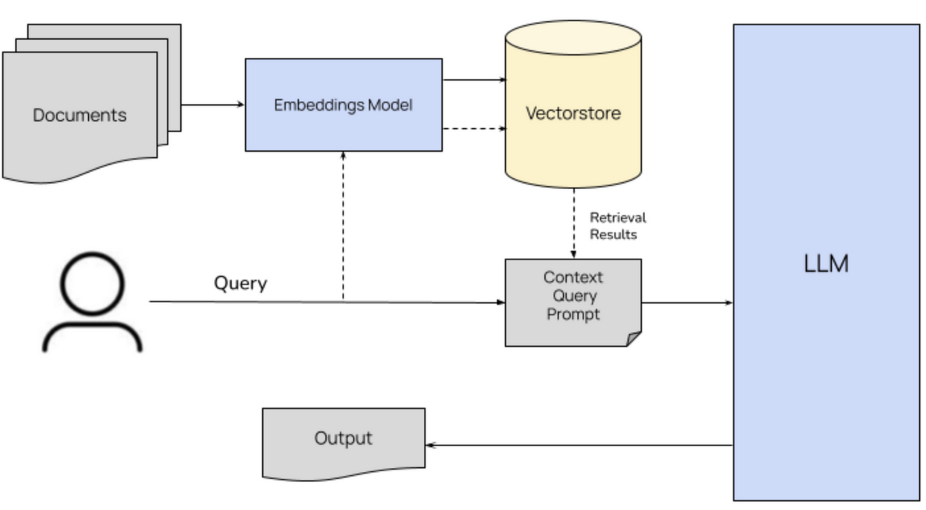

In [ ]:
# Lista con los path de los archivos
file_paths = ["/content/drive/MyDrive/adscripcion/Charla_colegio_ing_civil/documentacion/RS-2023-5-APN-SE_MEC.pdf",
              "/content/drive/MyDrive/adscripcion/Charla_colegio_ing_civil/documentacion/RS-2024-595-APN-SE_MEC.pdf",
              "/content/drive/MyDrive/adscripcion/Charla_colegio_ing_civil/documentacion/RS-2025-129-APN-SE_MEC.pdf",
]

all_documents = []

# Iteramos sobre cada archivo para cargarlo
for path in file_paths:
    try:
        # Usar PyPDFLoader para archivos PDF
        loader = PyPDFLoader(path)
        documents = loader.load()
        all_documents.extend(documents)
        print(f"‚úÖ Documento '{path}' cargado exitosamente - {len(documents)} p√°ginas.")
    except Exception as e:
        print(f"‚ùå Error al cargar el documento '{path}': {e}")

# Verificamos el resultado
print(f"\nTotal de documentos cargados: {len(all_documents)}")

# Inspeccionar el contenido
if all_documents:
    print("\n--- Ejemplo de contenido del primer documento ---")
    print(f"P√°gina: {all_documents[0].metadata}")
    print(all_documents[0].page_content[:300])  # Primeros 300 caracteres

‚úÖ Documento '/content/drive/MyDrive/adscripcion/Charla_colegio_ing_civil/documentacion/RS-2023-5-APN-SE_MEC.pdf' cargado exitosamente - 4 p√°ginas.
‚úÖ Documento '/content/drive/MyDrive/adscripcion/Charla_colegio_ing_civil/documentacion/RS-2024-595-APN-SE_MEC.pdf' cargado exitosamente - 26 p√°ginas.
‚úÖ Documento '/content/drive/MyDrive/adscripcion/Charla_colegio_ing_civil/documentacion/RS-2025-129-APN-SE_MEC.pdf' cargado exitosamente - 13 p√°ginas.

Total de documentos cargados: 43

--- Ejemplo de contenido del primer documento ---
P√°gina: {'producer': 'iText¬Æ 7.1.7 ¬©2000-2019 iText Group NV (AGPL-version); modified using iText¬Æ 7.1.7 ¬©2000-2019 iText Group NV (AGPL-version)', 'creator': 'PyPDF', 'creationdate': '2023-01-05T11:24:51-03:00', 'moddate': '2023-01-06T10:14:19-03:00', 'changed': '20100127;11124500', 'created': '0;0', 'generator': 'OpenOffice.org 3.1  (Win32)', 'info 1': '', 'info 2': '', 'info 3': '', 'info 4': '', 'source': '/content/drive/MyDrive/adscripcion/Charl

En esta celda se utiliza la clase **`RecursiveCharacterTextSplitter`** para dividir los documentos en fragmentos m√°s peque√±os o chunks, lo cual es √∫til para tareas como el procesamiento de texto o la indexaci√≥n para recuperaci√≥n de informaci√≥n. El par√°metro `chunk_size=500` indica que cada fragmento tendr√° hasta 500 caracteres, y `chunk_overlap=100` asegura que haya un solapamiento de 50 caracteres entre chunks consecutivos, lo que ayuda a mantener el contexto entre fragmentos adyacentes.

In [ ]:
# Dividir en chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)
chunks = text_splitter.split_documents(all_documents)
print(f"‚úÖ Documento dividido en {len(chunks)} chunks.")

‚úÖ Documento dividido en 220 chunks.


Se crean los embeddings y se construye una base vectorial (vectorstore) para facilitar la b√∫squeda sem√°ntica. Se utiliza el modelo "`all-MiniLM-L6-v2`" a trav√©s de la clase HuggingFaceEmbeddings. Este modelo convierte cada fragmento de texto (chunk) en un vector num√©rico que representa su significado. Luego, estos vectores se almacenan en una estructura de datos `FAISS`, una librer√≠a optimizada para b√∫squedas r√°pidas en espacios vectoriales, lo que permite recuperar informaci√≥n de manera eficiente basada en similitud sem√°ntica.

In [ ]:
# Crear embeddings y vectorstore
embeddings = HuggingFaceEmbeddings(
    model_name="all-MiniLM-L6-v2",
    model_kwargs={'device': 'cuda'}
)
vectorstore = FAISS.from_documents(chunks, embeddings)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [ ]:
import textwrap

# Crear el retriever con k variable
def crear_retriever(k=4):
    return vectorstore.as_retriever(
        search_type="similarity",
        search_kwargs={"k": k}
    )

# Funci√≥n para buscar documentos relevantes
def buscar_documentos_relevantes(pregunta, k=3):
    """Busca documentos relevantes para una pregunta"""
    retriever = crear_retriever(k)
    documentos = retriever.get_relevant_documents(pregunta)
    return documentos

# Prueba la b√∫squeda
pregunta_test = "¬øQu√© requisitos debe cumplir un profesional para ser auditor dentro del sistema PRONEV?"
docs_relevantes = buscar_documentos_relevantes(pregunta_test)

print("üìÑ Documentos encontrados:")
for i, doc in enumerate(docs_relevantes, 1):
    print(f"\n{i}. {doc.page_content[:70]}...")
    if hasattr(doc, 'metadata'):
        print(f"   Fuente: {doc.metadata}")

üìÑ Documentos encontrados:

1. Tendr√°n a cargo  realizar las Auditor√≠as del PRONEV.  Deber√°n (i) mant...
   Fuente: {'producer': 'iLovePDF', 'creator': 'PyPDF', 'creationdate': '', 'moddate': '2025-06-03T19:50:00+00:00', 'source': '/content/drive/MyDrive/adscripcion/Charla_colegio_ing_civil/documentacion/RS-2024-595-APN-SE_MEC.pdf', 'total_pages': 26, 'page': 9, 'page_label': '10'}

2. EJECUTORA NACIONAL. 
i. Informar a la UNIDAD EJECUTORA NACIONAL      l...
   Fuente: {'producer': 'iLovePDF', 'creator': 'PyPDF', 'creationdate': '', 'moddate': '2025-06-03T19:50:00+00:00', 'source': '/content/drive/MyDrive/adscripcion/Charla_colegio_ing_civil/documentacion/RS-2024-595-APN-SE_MEC.pdf', 'total_pages': 26, 'page': 8, 'page_label': '9'}

3. 1. Nombre, apellido, DNI y profesi√≥n. 
2. Usuario del AEV correspondie...
   Fuente: {'producer': 'iLovePDF', 'creator': 'PyPDF', 'creationdate': '', 'moddate': '2025-06-03T19:50:00+00:00', 'source': '/content/drive/MyDrive/adscripcion/Charla_coleg

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [ ]:
# Funci√≥n principal del RAG
def responder_con_rag(pregunta, k=4, max_tokens=512):
    """
    Funci√≥n principal del RAG que combina retrieval + generation
    """
    # 1. RETRIEVAL
    documentos_relevantes = buscar_documentos_relevantes(pregunta, k=k)

    # 2. CONTEXTO
    contexto = "\n\n".join([doc.page_content for doc in documentos_relevantes])

    # 3. PROMPT LIMPIO
    prompt = textwrap.dedent(f"""
        Bas√°ndote √∫nicamente en el siguiente CONTEXTO sobre eficiencia energ√©tica en Argentina,
        responde la PREGUNTA de manera precisa.

        CONTEXTO:
        '''
        {contexto}
        '''
        PREGUNTA:
        {pregunta}

""")

    # 4. GENERACI√ìN
    inputs = tokenizer(
        prompt,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=2048
    ).to("cuda")

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_tokens,
            temperature=0.1,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id
        )

    response = tokenizer.decode(outputs[0][inputs.input_ids.shape[1]:], skip_special_tokens=True)

    return {
        'respuesta': response.strip(),
        'documentos_fuente': documentos_relevantes,
        'contexto_usado': contexto
    }

In [ ]:
def comparar_respuestas(pregunta):
    """Compara respuesta con y sin RAG"""

    print("="*80)
    print(f"üîç PREGUNTA: {pregunta}")
    print("="*80)

    # Respuesta SIN RAG
    print("\nüö´ RESPUESTA SIN RAG:")
    print("-" * 40)
    respuesta_sin_rag = preguntar_modelo(pregunta)
    mostrar_respuesta_formateada(respuesta_sin_rag)

    # Respuesta CON RAG
    print("\n‚úÖ RESPUESTA CON RAG:")
    print("-" * 40)
    resultado_rag = responder_con_rag(pregunta)
    mostrar_respuesta_formateada(resultado_rag['respuesta'])

    # Mostrar fuentes
    print("\nüìö FUENTES UTILIZADAS:")
    print("-" * 40)
    for i, doc in enumerate(resultado_rag['documentos_fuente'], 1):
        print(f"{i}. {doc.page_content[:80]}...")
        if hasattr(doc, 'metadata') and doc.metadata:
            print(f"   üìÑ {doc.metadata}")

    return resultado_rag

In [ ]:
# Preguntas espec√≠ficas sobre eficiencia energ√©tica en Argentina
preguntas_test = [
    "¬øQu√© requisitos debe cumplir un profesional para ser auditor dentro del sistema PRONEV?",
    "¬øQu√© se entiende por 'Etiqueta de Eficiencia Energ√©tica' seg√∫n la normativa?"
]

# Probar cada pregunta
for pregunta in preguntas_test:
    resultado = comparar_respuestas(pregunta)
    print("\n" + "="*100 + "\n")

üîç PREGUNTA: ¬øQu√© requisitos debe cumplir un profesional para ser auditor dentro del sistema PRONEV?

üö´ RESPUESTA SIN RAG:
----------------------------------------


El Sistema Nacional de Auditor√≠a Energ√©tica (SNAE) es un marco regulatorio que aplica en Argentina, y su equivalente en el √°mbito de la eficiencia energ√©tica de viviendas se refiere al Programa Nacional de Evaluaci√≥n de Eficiencia Energ√©tica de Viviendas (PRONEV). Sin embargo, no existe un sistema espec√≠fico llamado "Sistema PRONEV" para auditor√≠as de viviendas.

Para ser un auditor en el contexto de la evaluaci√≥n de eficiencia energ√©tica de viviendas, generalmente se requieren los siguientes requisitos:

1. **Educaci√≥n**: Un nivel de educaci√≥n superior en ingenier√≠a el√©ctrica, electricidad, arquitectura, ingenier√≠a civil o cualquier otro campo relacionado con la energ√≠a y la construcci√≥n.

2. **Experiencia Profesional**: Algunos programas pueden requerir una experiencia m√≠nima en el campo de la eficiencia energ√©tica de viviendas. Esto puede variar seg√∫n la instituci√≥n o entidad que emita el certificado de auditor.

3. **Certificaci√≥n**: Existen certificaciones espec√≠ficas para auditores de eficiencia energ√©tica. En Argentina, por ejemplo, la Asociaci√≥n Argentina de Eficiencia Energ√©tica (AAEE) ofrece certificaciones en eficiencia energ√©tica. Para ser un auditor PRONEV, uno podr√≠a necesitar una certificaci√≥n en eficiencia energ√©tica de viviendas.

4. **Formaci√≥n Continuada**: La formaci√≥n continua es crucial en este campo, ya que las normativas y tecnolog√≠as cambian constantemente. Los auditores deben mantenerse actualizados sobre las √∫ltimas tendencias y regulaciones.

5. **Conocimientos T√©cnicos**: Deben tener conocimientos s√≥lidos sobre sistemas de calefacci√≥n, refrigeraci√≥n, iluminaci√≥n, ventanas y otros elementos de la vivienda que afectan a la eficiencia energ√©tica.

6. **Habilidades de Auditor√≠a**: Las habilidades de investigaci√≥n, an√°lisis y comunicaci√≥n son cruciales para realizar auditor√≠as efectivas.

7. **Licencia o Certificado**: Dependiendo de la entidad o instituci√≥n que emita el certificado, podr√≠an requerir un certificado de auditor√≠a emitido por una entidad autorizada.

Es importante verificar directamente con la entidad o instituci√≥n que emite el certificado de auditor√≠a para obtener informaci√≥n precisa y actualizada sobre los requisitos espec√≠ficos para ser


‚úÖ RESPUESTA CON RAG:
----------------------------------------


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


RESPUESTA:

Un profesional debe cumplir los siguientes requisitos para ser auditor dentro del sistema PRONEV:

1. **Registro en el Registro Nacional de Etiquetadores de Vivienda**: Los profesionales deben estar registrados en el Registro Nacional de Etiquetadores de Vivienda.

2. **Certificado de Aprobaci√≥n del Curso de Etiquetado**: Deben tener un certificado de aprobaci√≥n del curso de etiquetado otorgado por la Unidad Ejecutora Nacional.

3. **Curso de Auditor**: Deben haber completado y aprobado el curso de auditor otorgado por la Unidad Ejecutora Nacional.

4. **Inscripci√≥n en el Registro Nacional de Auditores**: Los auditores habilitados deber√°n inscribirse en el Registro Nacional de Auditores a partir de la publicaci√≥n de la presente medida.

5. **Cumplimiento de Lineamientos de la Unidad Ejecutora Nacional**: Los auditores deben cumplir con los lineamientos de la Unidad Ejecutora Nacional para el proceso de auditor√≠a del PRONEV.

6. **Actualizar Datos Personales y Profesionales**: Los profesionales deben mantener actualizados sus datos personales y profesionales en su perfil de usuario del AEV.

7. **Informar a la Unidad Ejecutora Nacional**: El titular o los titulares registrales del inmueble sujeto a VIVIENDA, objeto del proceso de etiquetado de eficiencia energ√©tica previsto en el PRONEV, pueden informar a la Unidad Ejecutora Nacional los profesionales que designen para desempe√±arse como auditores en su jurisdicci√≥n.

8. **Cumplir con Requisitos de Actualizaci√≥n**: Los profesionales deben cumplir con los requerimientos de actualizaci√≥n que determine la Unidad Ejecutora Nacional. 

Estos son los requisitos principales que deben cumplir los profesionales para ser considerados auditores dentro del sistema PRONEV. 

**Nota:** La informaci√≥n proporcionada en el contexto puede variar seg√∫n las actualizaciones regulares de la Unidad Ejecutora Nacional. Es recomendable consultar las √∫ltimas medidas y directrices oficiales para obtener la informaci√≥n m√°s precisa y actualizada. 

---

Esta respuesta es precisa y completa bas√°ndose en el contexto proporcionado. Si hay alguna otra pregunta o necesitas m√°s detalles espec√≠ficos,


üìö FUENTES UTILIZADAS:
----------------------------------------
1. Tendr√°n a cargo  realizar las Auditor√≠as del PRONEV.  Deber√°n (i) mantener actua...
   üìÑ {'producer': 'iLovePDF', 'creator': 'PyPDF', 'creationdate': '', 'moddate': '2025-06-03T19:50:00+00:00', 'source': '/content/drive/MyDrive/adscripcion/Charla_colegio_ing_civil/documentacion/RS-2024-595-APN-SE_MEC.pdf', 'total_pages': 26, 'page': 9, 'page_label': '10'}
2. EJECUTORA NACIONAL. 
i. Informar a la UNIDAD EJECUTORA NACIONAL      los Profesi...
   üìÑ {'producer': 'iLovePDF', 'creator': 'PyPDF', 'creationdate': '', 'moddate': '2025-06-03T19:50:00+00:00', 'source': '/content/drive/MyDrive/adscripcion/Charla_colegio_ing_civil/documentacion/RS-2024-595-APN-SE_MEC.pdf', 'total_pages': 26, 'page': 8, 'page_label': '9'}
3. 1. Nombre, apellido, DNI y profesi√≥n. 
2. Usuario del AEV correspondiente. 
3. C...
   üìÑ {'producer': 'iLovePDF', 'creator': 'PyPDF', 'creationdate': '', 'moddate': '2025-06-03T19:50:00+00:00', 's

La Etiqueta de Eficiencia Energ√©tica es una herramienta utilizada para evaluar y clasificar el rendimiento energ√©tico de los productos, en este caso, las viviendas. En Argentina, esta clasificaci√≥n se realiza en base a la Norma T√©cnica NTE 1024:2017, que establece criterios para la calificaci√≥n de la eficiencia energ√©tica de edificios residenciales.

Esta normativa divide a los edificios en cinco categor√≠as, desde la m√°s baja (C) hasta la m√°s alta (A+), donde:

* **A**: Edificio con un alto nivel de eficiencia energ√©tica.
* **B**: Edificio con un nivel medio de eficiencia energ√©tica.
* **C**: Edificio con un nivel bajo de eficiencia energ√©tica.
* **D**: Edificio con un nivel muy bajo de eficiencia energ√©tica.
* **C** y **D**: Edificios que no cumplen con los requisitos m√≠nimos de eficiencia energ√©tica.

Es importante tener en cuenta que la etiqueta de eficiencia energ√©tica no solo refleja el rendimiento energ√©tico del edificio en s√≠, sino tambi√©n la calidad de su dise√±o, construcci√≥n y mantenimiento. Adem√°s, esta clasificaci√≥n puede variar dependiendo del tipo de edificio (residencial, comercial, industrial, etc.) y del a√±o de construcci√≥n.

Para obtener una clasificaci√≥n precisa, es necesario realizar un an√°lisis detallado del edificio, incluyendo factores como la orientaci√≥n solar, la ventilaci√≥n, la insulaci√≥n, la iluminaci√≥n y la instalaci√≥n de sistemas de calefacci√≥n y refrigeraci√≥n.


‚úÖ RESPUESTA CON RAG:
----------------------------------------


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


RESPUESTA:
        Seg√∫n la normativa mencionada, la 'Etiqueta de Eficiencia Energ√©tica' es un medio dise√±ado para clasificar las viviendas seg√∫n su grado de eficiencia en el requerimiento global de energ√≠a primaria. Esta etiqueta permite identificar la eficiencia energ√©tica de las viviendas de acuerdo con un sistema uniforme en todo el territorio nacional. Se trata de un elemento visual que refleja la eficiencia energ√©tica de una vivienda, bas√°ndose en su requerimiento global de energ√≠a primaria. 

        En este contexto, la Etiqueta de Eficiencia Energ√©tica es un instrumento clave para promover la eficiencia energ√©tica en todo el pa√≠s, facilitando la comparaci√≥n y la selecci√≥n de viviendas m√°s eficientes. 

        [FIN]


üìö FUENTES UTILIZADAS:
----------------------------------------
1. implementar un sistema de etiquetado de eficiencia energ√©tica de vivienda unific...
   üìÑ {'producer': 'iLovePDF', 'creator': 'PyPDF', 'creationdate': '', 'moddate': '2025-06-03T19:51:50+00:00', 'source': '/content/drive/MyDrive/adscripcion/Charla_colegio_ing_civil/documentacion/RS-2025-129-APN-SE_MEC.pdf', 'total_pages': 13, 'page': 0, 'page_label': '1'}
2. unificado para todo el territorio nacional, que permita clasificarlas seg√∫n su g...
   üìÑ {'producer': 'iText¬Æ 7.1.7 ¬©2000-2019 iText Group NV (AGPL-version); modified using iText¬Æ 7.1.7 ¬©2000-2019 iText Group NV (AGPL-version)', 'creator': 'PyPDF', 'creationdate': '2023-01-05T11:24:51-03:00', 'moddate': '2023-01-06T10:14:19-03:00', 'changed': '20100127;11124500', 'created': '0;0', 'generator': 'OpenOffice.org 3.1  (Win32)', 'info 1': '', 'info 2': '', 'info 3': '', 'info 4': '', 'source': '/content/drive/MyDrive/adscripcion/Charla_colegio_ing_civil/doc

‚úÖ **Comparaci√≥n 1: Requisitos para ser auditor del PRONEV**\
üü• **Sin RAG**:

Mezcla conceptos ajenos al PRONEV (como el ‚ÄúSNAE‚Äù que no aparece en ninguna de las resoluciones).

Usa intuici√≥n general sobre eficiencia energ√©tica, pero no menciona ning√∫n requisito normativo real.

Habla de instituciones no relevantes (AAEE).

üü© **Con RAG**:

Extrae informaci√≥n directa de la resoluci√≥n: cursos, registros, funciones y condiciones.

Incluye detalles clave como la actualizaci√≥n de datos en el AEV o el rol de la Unidad Ejecutora Nacional.

Es una respuesta precisa, verificable y completa.

‚úÖ **Comparaci√≥n 2: ¬øQu√© es la Etiqueta de Eficiencia Energ√©tica?**\
üü• **Sin RAG:**

Describe un sistema gen√©rico de etiquetado (incluso con la Norma NTE 1024:2017), pero no es el del PRONEV.

Cita escalas incorrectas (A+, C, D...), lo cual puede confundir al usuario final.

Carece de referencia al AEV, la escala de A a G, o al IPE.

üü© **Con RAG**:

Define la etiqueta seg√∫n su funci√≥n normativa: clasificaci√≥n por requerimiento de energ√≠a primaria, aplicaci√≥n nacional, uso visual.

Est√° en l√≠nea con el documento oficial.

Le falt√≥ incluir la escala (A‚ÄìG) y el IPE.

**Beneficios de ejecutar los modelos de forma local:**

**Privacidad y seguridad de los datos**: Sus datos confidenciales nunca salen de su equipo. Ideal para informaci√≥n personal o empresarial confidencial.\
**Control y personalizaci√≥n**: Tiene control total sobre el modelo, su configuraci√≥n y c√≥mo se integra en sus flujos de trabajo.\
**Reducci√≥n de costos** (a largo plazo): Al usar modelos locales, elimina los costos de usar API en la nube, especialmente con un uso intensivo.\
**Operaci√≥n sin conexi√≥n**: Capacidad de operar sin conexi√≥n a internet (una vez descargado el modelo).

**Desafios de ejecutar los modelos de forma local:**

**Requisitos de hardware**: Los LLM son exigentes. Necesita una CPU decente, suficiente RAM y, principalmente, una GPU.\
**Complejidad de configuraci√≥n**: Poner todo en funcionamiento requiere varios conocimientos t√©cnicos.\
**Tama√±o del model**o: Los modelos LLM peque√±os para uso local pueden ocupar varios gigabytes de espacio.\
**Conocimiento limitado del modelo LLM peque√±o**: Los modelos base solo conocen la fecha de su √∫ltimo entrenamiento.